In [2]:
import tensorflow as tf
import datetime

In [4]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train,x_test = x_train/255.0, x_test /255.0

11490434/11490434 [==============================] - 1s 0us/step


In [28]:
print(x_train.shape)
print(x_test.shape)
print(x_train.dtype)

(60000, 28, 28)
(10000, 28, 28)
float64


In [13]:
def create_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10,activation='softmax')
    ])

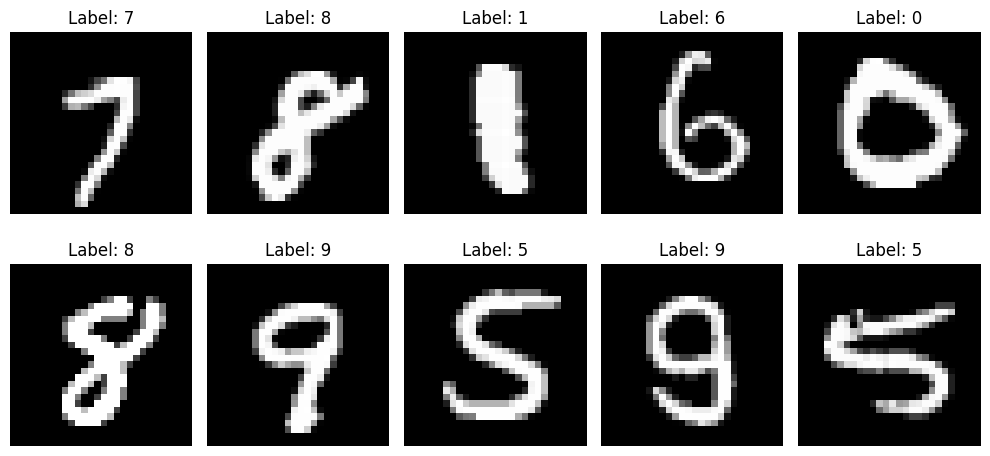

In [39]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.flatten()

for i in range(10):
    idx = np.random.randint(0, len(x_test))
    axes[i].imshow(x_test[idx], cmap="gray")
    axes[i].set_title(f"Label: {y_test[idx]}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [19]:
model = create_model()
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_train,
         y=y_train,
         epochs=5,
         validation_data=(x_test,y_test),)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2214 - accuracy: 0.9349 - val_loss: 0.1106 - val_accuracy: 0.9652
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0976 - accuracy: 0.9707 - val_loss: 0.0829 - val_accuracy: 0.9740
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0693 - accuracy: 0.9783 - val_loss: 0.0624 - val_accuracy: 0.9811
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0536 - accuracy: 0.9831 - val_loss: 0.0677 - val_accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0440 - accuracy: 0.9860 - val_loss: 0.0701 - val_accuracy: 0.9792


In [26]:
tahminler = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [32]:
tahminler_sinif = tf.argmax(tahminler, axis=1)
matris = tf.math.confusion_matrix(y_test, tahminler_sinif)
print(matris)

tf.Tensor(
[[ 969    0    1    0    2    2    2    1    2    1]
 [   0 1128    3    0    0    0    2    0    2    0]
 [   0    3 1014    0    1    0    0    8    5    1]
 [   0    1    5  976    0    2    0    8    8   10]
 [   0    0    7    0  957    0    0    3    1   14]
 [   2    0    0   12    2  862    2    0    7    5]
 [   1    2    2    1    4    9  938    0    1    0]
 [   0    3    6    0    1    0    0 1008    1    9]
 [   0    0    2    3    5    1    0    6  948    9]
 [   2    3    0    2    4    1    0    5    0  992]], shape=(10, 10), dtype=int32)


In [40]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0701 - accuracy: 0.9792


In [41]:
print(test_loss)
print(test_acc)

0.07012886554002762
0.979200005531311
